In [71]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal
from scipy import *
import copy
from scipy.io import loadmat

In [72]:
signal = loadmat('denoising_codeChallenge.mat')
sig=signal['origSignal'][0]
csig=signal['cleanedSignal'][0]


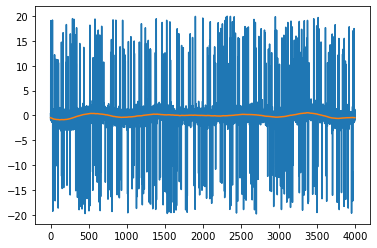

In [73]:
timevec = np.arange(0,len(sig))
plt.plot(timevec,sig)
plt.plot(timevec,csig)#req signal
plt.show()

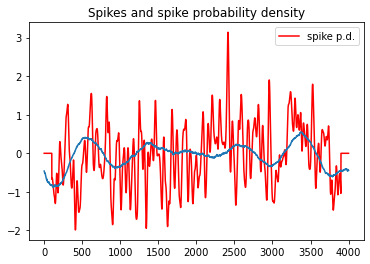

In [74]:
## create and implement Gaussian window

# full-width half-maximum: the key Gaussian parameter
fwhm = 25 # in points

# normalized time vector in ms
k = 100;
gtime = np.arange(-k,k)

# create Gaussian window
gauswin = np.exp( -(4*np.log(2)*gtime**2) / fwhm**2 )
gauswin = gauswin / np.sum(gauswin)

# initialize filtered signal vector
filtsigG = np.zeros(len(sig))

# implement the weighted running mean filter
for i in range(k+1,len(sig)-k-1):
    filtsigG[i] = np.sum( sig[i-k:i+k]*gauswin )


# plot the filtered signal (spike probability density)
#plt.plot(sig,'b',label='spikes')
plt.plot(timevec,filtsigG,'r',label='spike p.d.')
plt.plot(timevec,csig)
plt.legend()
plt.title('Spikes and spike probability density')
plt.show()
sig=filtsigG

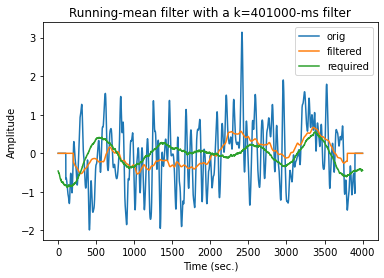

In [75]:
# initialize filtered signal vector
n=len(sig)
filtsig = np.zeros(n)

# implement the running mean filter
k = 200 # filter window is actually k*2+1
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(sig[i-k:i+k])

# compute window size in ms
windowsize = 1000*(k*2+1) 


# plot the noisy and filtered signals
plt.plot(timevec,sig,label='orig')
plt.plot(timevec,filtsig,label='filtered')
plt.plot(timevec,csig,label="required")

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()

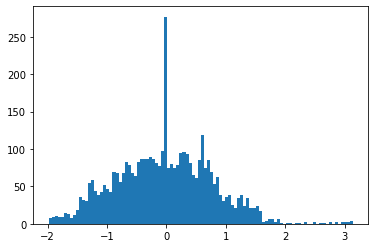

In [76]:
#for determining the threshhold values
plt.hist(sig,100)
plt.show()



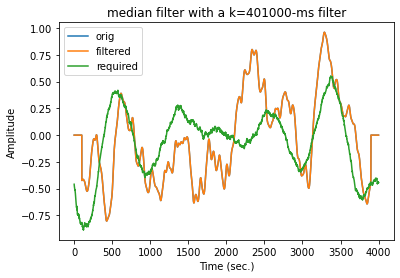

In [70]:
# visual-picked threshold
threshold = 5


# find data values above the threshold
suprathresh = np.where( abs(sig)>abs(threshold) )[0]

# initialize filtered signal
filtsig = copy.deepcopy(sig)

# loop through suprathreshold points and set to median of k
k = 20 # actual window is k*2+1
for ti in range(0,len(suprathresh)):
    
    # lower and upper bounds
    lowbnd = np.max((1,suprathresh[ti]-k))
    uppbnd = np.min((suprathresh[ti]+k,n))
    
    # compute median of surrounding points
    filtsig[suprathresh[ti]] = np.median(sig[lowbnd:uppbnd])

# plot
plt.plot(timevec,sig,label='orig')
plt.plot(timevec,filtsig,label='filtered')
plt.plot(timevec,csig,label="required")

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('median filter with a k=%d-ms filter' %windowsize)
plt.show()

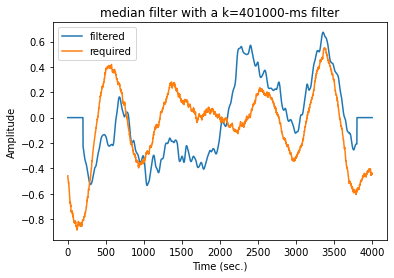

In [78]:
plt.plot(timevec,filtsig,label='filtered')
plt.plot(timevec,csig,label="required")
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('median filter with a k=%d-ms filter' %windowsize)
sig=filtsig

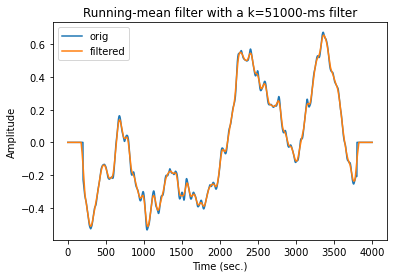

In [85]:
# initialize filtered signal vector
n=len(sig)
filtsig = np.zeros(n)

# implement the running mean filter
k = 25 # filter window is actually k*2+1
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtsig[i] = np.mean(sig[i-k:i+k])

# compute window size in ms
windowsize = 1000*(k*2+1)


# plot the noisy and filtered signals
plt.plot(sig,label='orig')
plt.plot(filtsig,label='filtered')

plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Running-mean filter with a k=%d-ms filter' %windowsize)

plt.show()